# Predicting heart disease using machine learning 

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether or not someone has heart disease based on their medical attributes.

## 1. Problem Definition
> Given clinical parameters about a patient, can we predict whether or not they have heart disease?

## 2. Data
The original data came from the Cleavland data from the UCI Machine Learning Repository. https://archive.ics.uci.edu/ml/datasets/heart+Disease

There is also a version of it available on Kaggle. https://www.kaggle.com/datasets/sumaiyatasmeem/heart-disease-classification-dataset

## 3. Evaluation

> If we can reach 95% accuracy at predicting whether or not a patient has heart disease during the proof of concept, we'll pursue the project.

## 4. Features

#### Data dictionary

1. age - age in years
2. sex - (1 = male; 0 = female)
3. cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease
4. trestbps - resting blood pressure (in mm Hg on admission to the hospital) anything above 130-140 is typically cause for concern
5. chol - serum cholestoral in mg/dl
   * serum = LDL + HDL + .2 * triglycerides
   * above 200 is cause for concern
6. fbs - (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
   * '>126' mg/dL signals diabetes
7restecg - resting electrocardiographic results
   * 0: Nothing to note
   * 1: ST-T Wave abnormality
     * can range from mild symptoms to severe problems
     * signals non-normal heart beat
   * 2: Possible or definite left ventricular hypertrophy
     * Enlarged heart's main pumping chamber
8. thalach - maximum heart rate achieved
9. exang - exercise induced angina (1 = yes; 0 = no)
10. oldpeak - ST depression induced by exercise relative to rest looks at stress of heart during excercise unhealthy heart will stress more
11. slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart
12. ca - number of major vessels (0-3) colored by flourosopy
   * colored vessel means the doctor can see the blood passing through
   * the more blood movement the better (no clots)
13. thal - thalium stress result
   * 1,3: normal
   * 6: fixed defect: used to be defect but ok now
   * 7: reversable defect: no proper blood movement when excercising
14. target - have disease or not (1=yes, 0=no) (= the predicted attribute)

In [249]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve

In [160]:
df = pd.read_csv("heart-disease.csv")
df.shape # (rows, columns)

(303, 14)

## Data Exploration (explantory data analysis or EDA)

1. What question(s) are we trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [161]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [162]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [163]:
df["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

<AxesSubplot: >

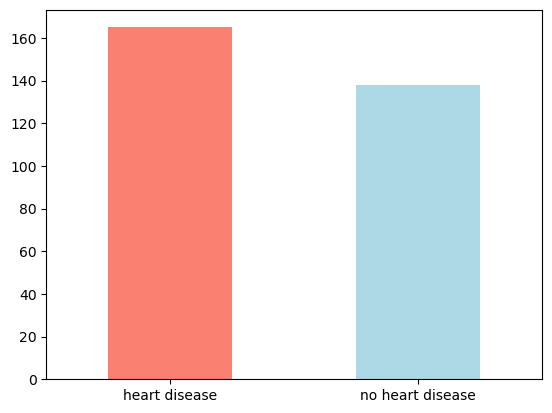

In [189]:
df["target"].map({1: "heart disease", 0: "no heart disease"}).value_counts().plot(
    kind="bar", color=["salmon", "lightblue"], rot=0
)


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [191]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [192]:
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


#### Heart Disease Frequency according to Sex

In [193]:
df.sex.value_counts()


1    207
0     96
Name: sex, dtype: int64

In [194]:
pd.crosstab(df.target, df.sex)


sex,0,1
target,,
0,24,114
1,72,93


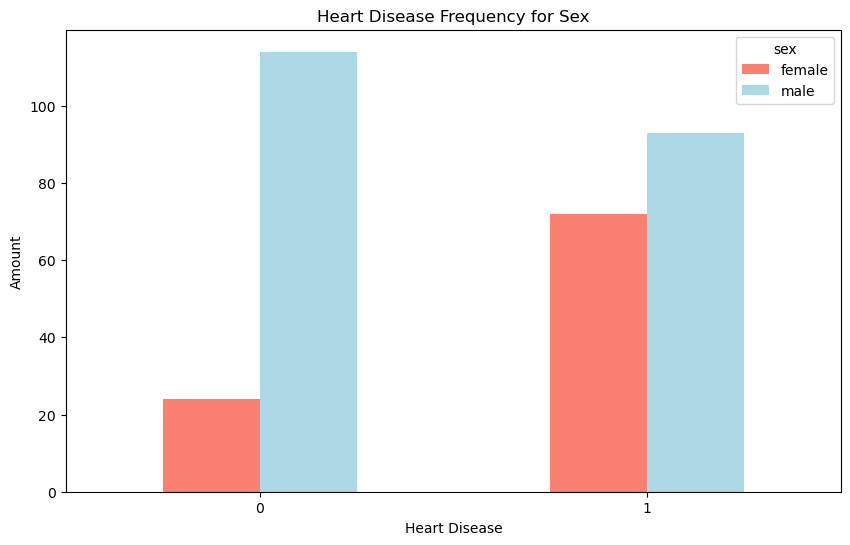

In [196]:
pd.crosstab(df.target, df.sex.map({1: "male", 0: "female"})).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"],
    title="Heart Disease Frequency for Sex",
    xlabel="Heart Disease",
    ylabel="Amount",
    rot=0,
);


#### Age vs Max Heart Rate for heart disease


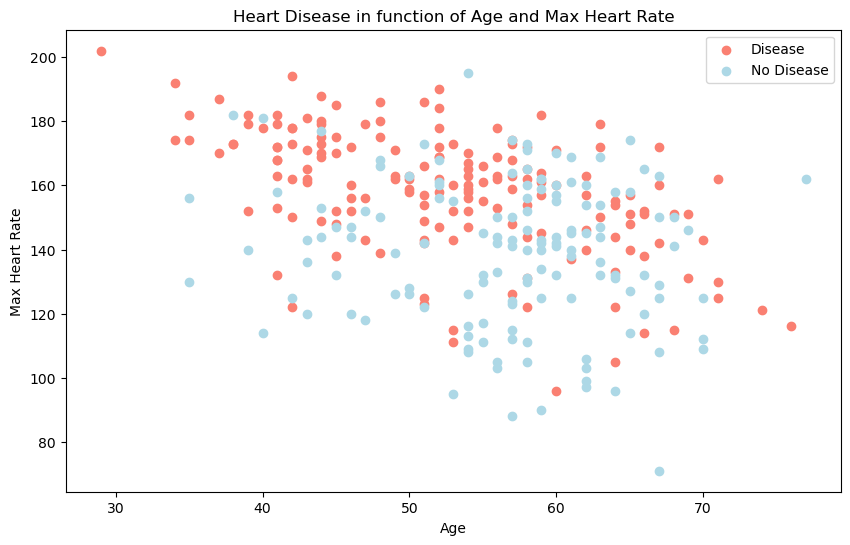

In [197]:
plt.figure(figsize=(10, 6))

# Positive
plt.scatter(df.age[df.target == 1], df.thalach[df.target == 1], c="salmon")

# Negative
plt.scatter(df.age[df.target == 0], df.thalach[df.target == 0], c="lightblue")

plt.title("Heart Disease in function of Age and Max Heart Rate")
plt.xlabel("Age")
plt.ylabel("Max Heart Rate")
plt.legend(["Disease", "No Disease"]);

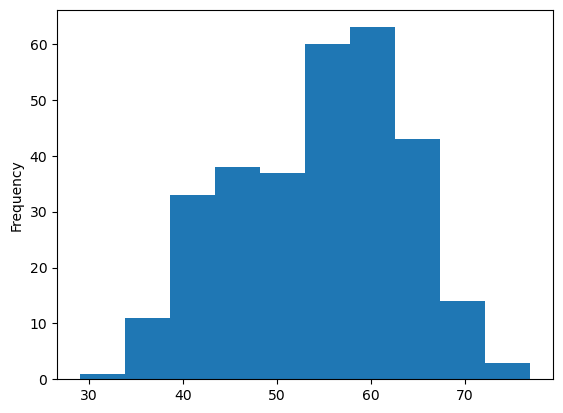

In [198]:
df.age.plot.hist();

#### Heart disease frenquency per chest pain type
cp - chest pain type
   * 0: Typical angina: chest pain related decrease blood supply to the heart
   * 1: Atypical angina: chest pain not related to heart
   * 2: Non-anginal pain: typically esophageal spasms (non heart related)
   * 3: Asymptomatic: chest pain not showing signs of disease

In [199]:
pd.crosstab(df.cp, df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


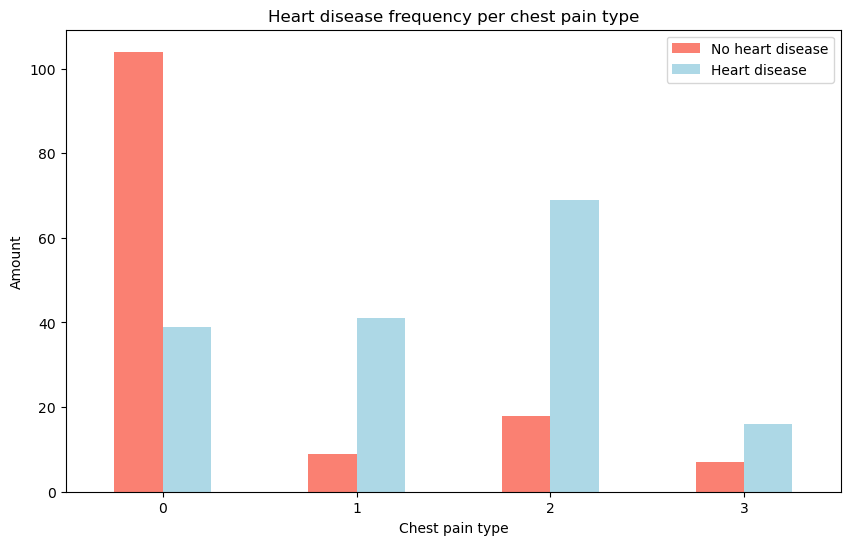

In [200]:
pd.crosstab(df.cp, df.target).plot(
    kind="bar",
    figsize=(10, 6),
    color=["salmon", "lightblue"],
    title="Heart disease frequency per chest pain type",
    xlabel="Chest pain type",
    ylabel="Amount",
    rot=0,
)

plt.legend(["No heart disease", "Heart disease"]);


In [201]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


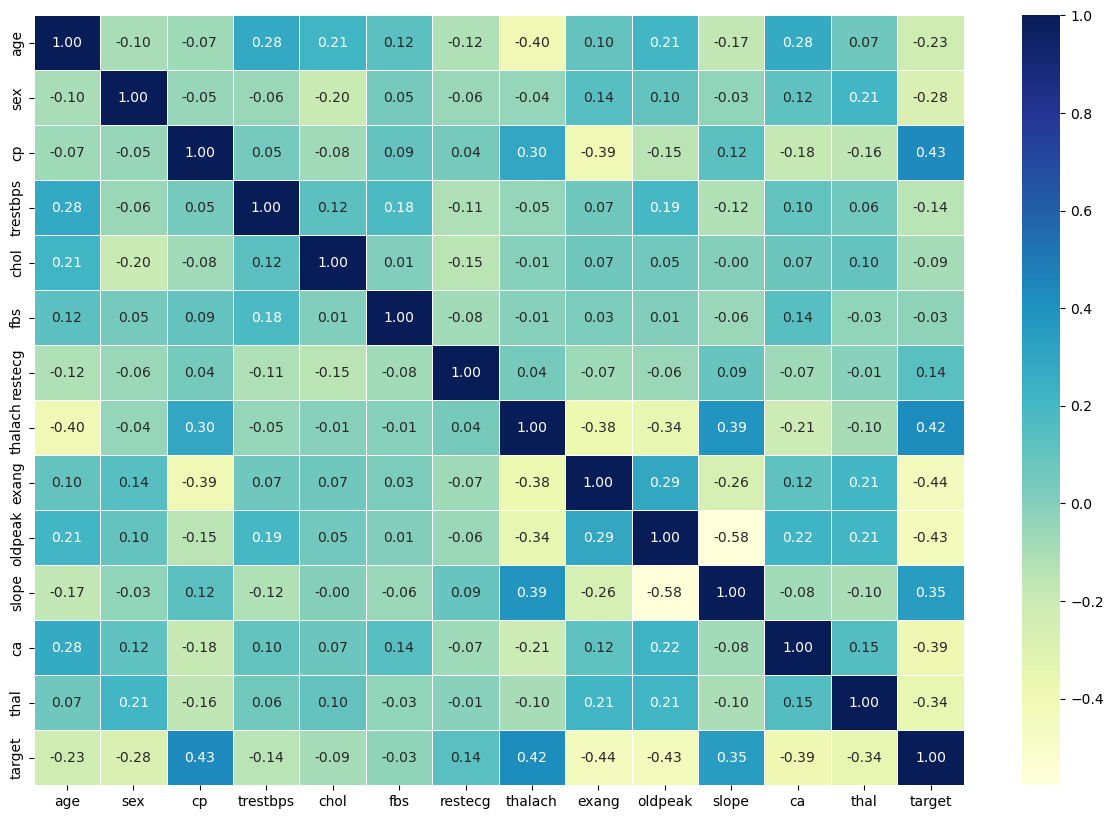

In [202]:
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(corr_matrix, annot=True, linewidths=0.5, fmt=".2f", cmap="YlGnBu")

# bottom, top = ax.get_ylim()
# ax.set_ylim(bottom + 0.5, top - 0.5);


## Modeling

In [203]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [204]:
X = df.drop("target", axis=1)
y = df["target"]

In [206]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [207]:
y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [208]:
np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [209]:
models = {
    "Logistic Regression": LogisticRegression(),
    "KNN": KNeighborsClassifier(),
    "Random Forest": RandomForestClassifier(),
}


def fit_and_score(models, X_train, X_test, y_train, y_test):
    """
    Accept a dictionary of models (name_of_model: sklearn_model)

    Fits and evaluates for each model

    Return (name_of_model: score)
    """
    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)

    return model_scores


In [210]:
model_scores = fit_and_score(models, X_train, X_test, y_train, y_test)

model_scores


d:\Projects\ZTM\Detect-Heart-Disease\venv\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

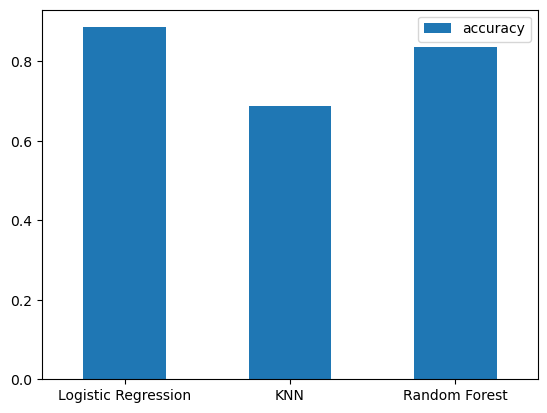

In [213]:
model_compare = pd.DataFrame(model_scores, index=["accuracy"])
model_compare.T.plot.bar(rot=0);

* Hyperparameter tuning
* Feature importance
* Confusion matrix
* Cross-validation
* Precision
* Recall
* F1 score
* Classification report
* ROC curve
* Area under the curve (AUC)

## Hyperparameter tuning

In [215]:
train_scores = []
test_scores = []

neighbors = range(1, 21)

knn = KNeighborsClassifier()

for i in neighbors:
    knn.set_params(n_neighbors=i)

    knn.fit(X_train, y_train)

    train_scores.append(knn.score(X_train, y_train))

    test_scores.append(knn.score(X_test, y_test))

In [216]:
train_scores

[1.0,
 0.8099173553719008,
 0.7727272727272727,
 0.743801652892562,
 0.7603305785123967,
 0.7520661157024794,
 0.743801652892562,
 0.7231404958677686,
 0.71900826446281,
 0.6942148760330579,
 0.7272727272727273,
 0.6983471074380165,
 0.6900826446280992,
 0.6942148760330579,
 0.6859504132231405,
 0.6735537190082644,
 0.6859504132231405,
 0.6652892561983471,
 0.6818181818181818,
 0.6694214876033058]

In [217]:
test_scores

[0.6229508196721312,
 0.639344262295082,
 0.6557377049180327,
 0.6721311475409836,
 0.6885245901639344,
 0.7213114754098361,
 0.7049180327868853,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.7540983606557377,
 0.7377049180327869,
 0.7377049180327869,
 0.7377049180327869,
 0.6885245901639344,
 0.7213114754098361,
 0.6885245901639344,
 0.6885245901639344,
 0.7049180327868853,
 0.6557377049180327]

Maximum KNN score on the test data:  75.41%


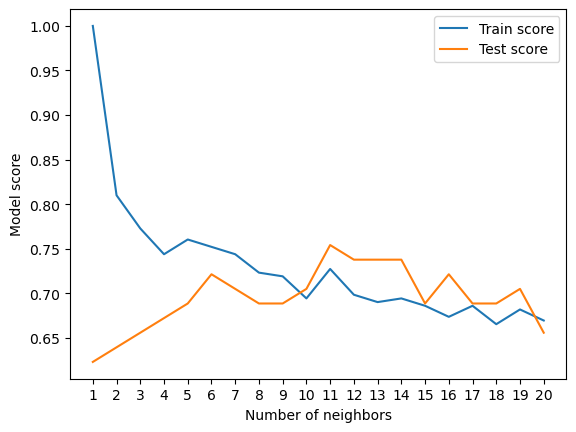

In [220]:
plt.plot(neighbors, train_scores, label="Train score")
plt.plot(neighbors, test_scores, label="Test score")
plt.xticks(np.arange(1, 21, 1))
plt.xlabel("Number of neighbors")
plt.ylabel("Model score")
plt.legend()

print(f"Maximum KNN score on the test data: {max(test_scores) * 100: .2f}%")


## Hyperparameter tuning with RandomizedSearchCV

In [227]:
# Hyperparameter grid for Logistic Regression
log_reg_grid = {"C": np.logspace(-4, 4, 20), "solver": ["liblinear"]}

# Hyperparameter grid for Random Forest Classifier
rf_grid = {
    "n_estimators": np.arange(10, 1000, 50),
    "max_depth": [None, 3, 5, 10],
    "min_samples_split": np.arange(2, 20, 2),
    "min_samples_leaf": np.arange(1, 20, 2),
}


In [223]:
np.random.seed(42)

rs_log_reg = RandomizedSearchCV(LogisticRegression(), param_distributions=log_reg_grid, cv=5, n_iter=20, verbose=True)
rs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=LogisticRegression(), n_iter=20,
                   param_distributions={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                                        'solver': ['liblinear']},
                   verbose=True)

In [224]:
rs_log_reg.best_params_

{'solver': 'liblinear', 'C': 0.23357214690901212}

In [225]:
rs_log_reg.score(X_test, y_test)

0.8852459016393442

In [228]:
np.random.seed(42)

rs_rf = RandomizedSearchCV(RandomForestClassifier(), param_distributions=rf_grid, cv=5, n_iter=20, verbose=True)
rs_rf.fit(X_train, y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(), n_iter=20,
                   param_distributions={'max_depth': [None, 3, 5, 10],
                                        'min_samples_leaf': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19]),
                                        'min_samples_split': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 10,  60, 110, 160, 210, 260, 310, 360, 410, 460, 510, 560, 610,
       660, 710, 760, 810, 860, 910, 960])},
                   verbose=True)

In [229]:
rs_rf.best_params_

{'n_estimators': 210,
 'min_samples_split': 4,
 'min_samples_leaf': 19,
 'max_depth': 3}

In [230]:
rs_rf.score(X_test, y_test)

0.8688524590163934

In [231]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Hyperparameter tuning with GridSearchCV

In [233]:
log_reg_grid = {"C": np.logspace(-4, 4, 30), "solver": ["liblinear"]}


gs_log_reg = GridSearchCV(LogisticRegression(), param_grid=log_reg_grid, cv=5, verbose=True)

gs_log_reg.fit(X_train, y_train)


Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': array([1.00000000e-04, 1.88739182e-04, 3.56224789e-04, 6.72335754e-04,
       1.26896100e-03, 2.39502662e-03, 4.52035366e-03, 8.53167852e-03,
       1.61026203e-02, 3.03919538e-02, 5.73615251e-02, 1.08263673e-01,
       2.04335972e-01, 3.85662042e-01, 7.27895384e-01, 1.37382380e+00,
       2.59294380e+00, 4.89390092e+00, 9.23670857e+00, 1.74332882e+01,
       3.29034456e+01, 6.21016942e+01, 1.17210230e+02, 2.21221629e+02,
       4.17531894e+02, 7.88046282e+02, 1.48735211e+03, 2.80721620e+03,
       5.29831691e+03, 1.00000000e+04]),
                         'solver': ['liblinear']},
             verbose=True)

In [234]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [235]:
gs_log_reg.score(X_test, y_test)

0.8852459016393442

In [236]:
model_scores

{'Logistic Regression': 0.8852459016393442,
 'KNN': 0.6885245901639344,
 'Random Forest': 0.8360655737704918}

## Evaluate machine learning classifier beyond accurracy

* ROC curve and AUC curve
* Confusion matrix
* Classification report
* Precision
* Recall
* F1-score

.... and it would be great if cross-validation was used where possible

In [238]:
y_preds = gs_log_reg.predict(X_test)

In [239]:
y_preds

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0], dtype=int64)

In [240]:
y_test

179    0
228    0
111    1
246    0
60     1
      ..
249    0
104    1
300    0
193    0
184    0
Name: target, Length: 61, dtype: int64

d:\Projects\ZTM\Detect-Heart-Disease\venv\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; Function :func:`plot_roc_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: :meth:`sklearn.metrics.RocCurveDisplay.from_predictions` or :meth:`sklearn.metrics.RocCurveDisplay.from_estimator`.
  warnings.warn(msg, category=FutureWarning)


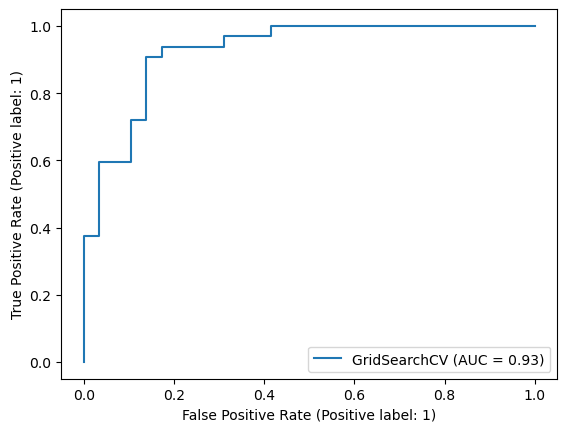

In [242]:
plot_roc_curve(gs_log_reg, X_test, y_test);

In [243]:
print(confusion_matrix(y_test, y_preds))

[[25  4]
 [ 3 29]]


In [244]:
sns.set(font_scale=1.5)


def plot_conf_mat(y_test, y_preds):
    """
    Plots a confusion matrix using Seaborn's heatmap().
    """
    fig, ax = plt.subplots(figsize=(3, 3))
    ax = sns.heatmap(
        confusion_matrix(y_test, y_preds), annot=True, cbar=False  # Annotate the boxes
    )
    plt.xlabel("Predicted label")  # predictions go on the x-axis
    plt.ylabel("True label")  # true labels go on the y-axis


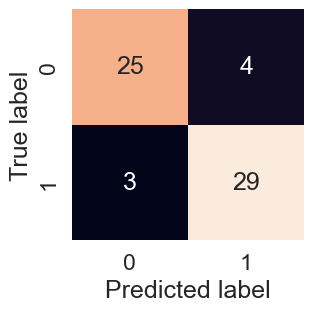

In [245]:
plot_conf_mat(y_test, y_preds)

In [246]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88        29
           1       0.88      0.91      0.89        32

    accuracy                           0.89        61
   macro avg       0.89      0.88      0.88        61
weighted avg       0.89      0.89      0.89        61



### Calculate evaluation metrics using cross-validation

In [247]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [248]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

In [251]:
# Cross-validation accuracy
cv_acc = cross_val_score(clf, X, y, cv=5, scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.86885246, 0.88333333, 0.75      ])

In [253]:
cv_acc = np.mean(cv_acc)
cv_acc

0.8446994535519124

In [255]:
# Cross-validation precision
cv_precision = cross_val_score(clf, X, y, cv=5, scoring="precision")
cv_precision = np.mean(cv_precision)
cv_precision


0.8207936507936507

In [256]:
# Cross-validation recall
cv_recall = cross_val_score(clf, X, y, cv=5, scoring="recall")
cv_recall = np.mean(cv_recall)
cv_recall


0.9212121212121213

In [258]:
# Cross-validation f1-score
cv_f1 = cross_val_score(clf, X, y, cv=5, scoring="f1")
cv_f1 = np.mean(cv_f1)
cv_f1


0.8673007976269721

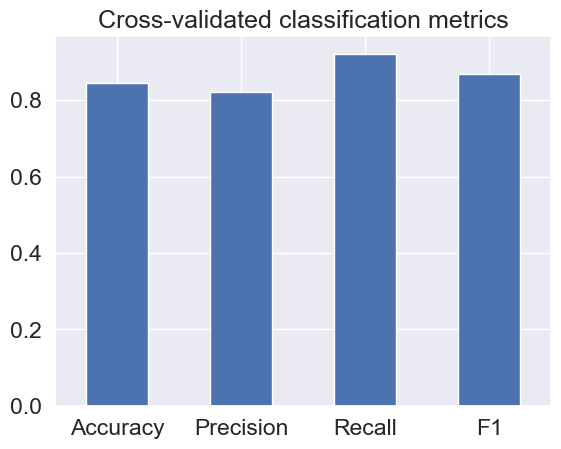

In [260]:
# Visualize cross-validated metrics
cv_metrics = pd.DataFrame(
    {
        "Accuracy": cv_acc,
        "Precision": cv_precision,
        "Recall": cv_recall,
        "F1": cv_f1,
    },
    index=[0],
)

cv_metrics.T.plot.bar(title="Cross-validated classification metrics", legend=False, rot=0);


### Feature importance

In [262]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [263]:
gs_log_reg.best_params_

{'C': 0.20433597178569418, 'solver': 'liblinear'}

In [264]:
clf = LogisticRegression(C=0.20433597178569418, solver="liblinear")

clf.fit(X_train, y_train);

In [266]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [265]:
clf.coef_

array([[ 0.00316728, -0.86044652,  0.6606704 , -0.01156993, -0.00166375,
         0.04386107,  0.31275848,  0.02459362, -0.60413081, -0.56862803,
         0.45051628, -0.63609898, -0.67663373]])

In [267]:
feature_dict = dict(zip(df.columns, list(clf.coef_[0])))
feature_dict

{'age': 0.0031672806268220445,
 'sex': -0.8604465226286001,
 'cp': 0.6606703996492814,
 'trestbps': -0.011569930743501303,
 'chol': -0.001663745833540806,
 'fbs': 0.043861067871676124,
 'restecg': 0.3127584791782968,
 'thalach': 0.02459361509185037,
 'exang': -0.6041308102637141,
 'oldpeak': -0.5686280255489925,
 'slope': 0.4505162810238786,
 'ca': -0.6360989756865822,
 'thal': -0.67663372723561}

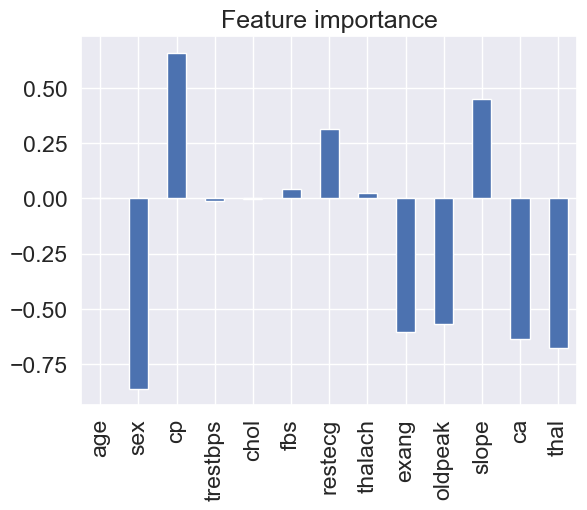

In [271]:
# Visualize feature importance

feature_df = pd.DataFrame(feature_dict, index=[0])

feature_df.T.plot.bar(title="Feature importance", legend=False);

In [273]:
pd.crosstab(df["sex"], df["target"])

target,0,1
sex,,
0,24,72
1,114,93


slope - the slope of the peak exercise ST segment
   * 0: Upsloping: better heart rate with excercise (uncommon)
   * 1: Flatsloping: minimal change (typical healthy heart)
   * 2: Downslopins: signs of unhealthy heart

In [274]:
pd.crosstab(df["slope"], df["target"])

target,0,1
slope,,
0,12,9
1,91,49
2,35,107


## Experimentation

* Collect more data?
* Try a better model? CatBoost or XGBoost?
* Improve the current models? (beside what we've done so far)
* Export model and share it with others?